# Pathfinding demo

## List of methods

Non-exhaustive list of methods follows.

$V$ is the set of all vertices; $E$ is the set of all edges; $|V|$ is the size of the set

1. Depth-first search
    - s
1. [Bellman-Ford algorithm](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm)
    - exhaustive method
    - $O(|V|*|E|)$
2. Dijkstra
3. A*

In [85]:
#
# Imports
#

import matplotlib.pyplot as plt
import numpy as np
from typing import Protocol, Optional

In [86]:
#
# Type and interfaces definition
#

type Point2D = tuple[int, int] # tuple(x, y)
type Path = list[Point2D]
type ElapsedTime_ns = float # nanoseconds
type VisitedNodeCount = int

class Map:
    """
    2D map consisting of cells with given cost
    """
    array: np.array

    def __init__(self, width: int, height: int) -> None:
        assert width > 0
        assert height > 0
        self.array = np.zeros((width, height), dtype=np.float64)

    def Randomize(self, low: float = 0.0, high: float = 1.0) -> None:
        self.array = np.random.uniform(low, high, self.array.shape)

    def GetCost(self, point: Point2D) -> float:
        return self.array[point]
    
    def IsPointValid(self, point: Point2D) -> bool:
        ...
    
    def GetNeighbours(self) -> list[Point2D]:
        ...

        

class PathFinder(Protocol):
    def SetMap(m: Map) -> None:
        ...

    def CalculatePath(start: Point2D, end: Point2D) -> Path:
        """
        Calculate path on a given map.
        Note: map must be set first using SetMap (or using constructor)
        """

    def GetStats() -> (ElapsedTime_ns, VisitedNodeCount):
        """
        Return performance stats for the last calculation:
        - elapsed time in nanoseconds,
        - number of visited nodes during search
        """


In [87]:
#
# Drawing utilities
#

class Visualizer:
    _axes: Optional[plt.Axes]
    _cmap: plt.Colormap
    _cmap_counter: int
    
    def __init__(self):
        self._axes = None
        self._cmap = plt.get_cmap('tab10')
        self._cmap_counter = 0
    
    def DrawMap(self, m: Map):
        M, N = m.array.shape
        _, ax = plt.subplots()
        ax.imshow(m.array, cmap='terrain', origin='lower', interpolation='none')
        self._axes = ax

    def DrawPath(self, path: Path, label: str = "Path"):
        """
        Draw path on a map. Note that DrawMap has to be called first
        """
        assert self._axes is not None, "DrawMap must be called first"
        xs, ys = zip(*path)
        color = self._cmap(self._cmap_counter)
        self._cmap_counter += 1
        self._axes.plot(xs, ys, 'o-', color=color, label=label)
        self._axes.plot(xs[0],  ys[0],  'o', color='lime',  markersize=8)  # starting point
        self._axes.plot(xs[-1], ys[-1], 'o', color='magenta', markersize=8)  # end point
        

In [88]:
#
# Method: depth-first search
#

class DFS:

    name = "Depth First Search"
    _map: Optional[Map]
    
    def __init__(self) -> None:
        self._map = None
    
    def SetMap(self, m: Map) -> None:
        self._map = m
        
    def CalculatePath(self, start: Point2D, end: Point2D) -> Path:
        assert m is not None, "SetMap must be called first"
        return [(0,0), (5,5), (6,6), (1,9)]

    def GetStats(self) -> (ElapsedTime_ns, VisitedNodeCount):
        return 150.0, 42


class BFS:

    name = "Breadth First Search"
    _map: Optional[Map]
    
    def __init__(self) -> None:
        self._map = None
    
    def SetMap(self, m: Map) -> None:
        self._map = m
        
    def CalculatePath(self, start: Point2D, end: Point2D) -> Path:
        assert m is not None, "SetMap must be called first"
        return [(0,0), (1,0), (2,0), (3,0)]

    def GetStats(self) -> (ElapsedTime_ns, VisitedNodeCount):
        return 300.0, 21

Breadth First Search  : took 300.0 ns, visited 21 nodes
Depth First Search    : took 150.0 ns, visited 42 nodes


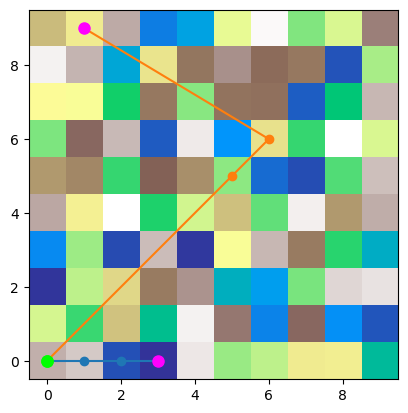

In [89]:
# Define the map and start/stop points
m = Map(10, 10)
m.Randomize()
starting_point: Point2D = (0,0)
end_point: Point2D = (9,9)

#
# Calculate paths using various methods and visualize them
#

path_finder_classes: list[PathFinder] = {
    DFS, BFS
}

v = Visualizer()
v.DrawMap(m)

for pt in path_finder_classes:
    path_finder = pt()
    path_finder.SetMap(m)
    path = path_finder.CalculatePath(starting_point, end_point)
    elapsed_time, visited_nodes = path_finder.GetStats()
    print(f"{path_finder.name:22}: took {elapsed_time} ns, visited {visited_nodes} nodes")
    v.DrawPath(path)

